# 0.0 Imports

In [1]:
from platform import python_version

print(python_version())

3.8.9


In [4]:
import sys

print(sys.version)

3.8.9 (default, Mar 20 2023, 17:07:42) 
[GCC 11.3.0]


## 0.1 Helper Functions

In [1]:
import pandas as pd
import inflection        # o módulo inflection é usado para manipular strings
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 0.2 Loading data

In [2]:
# o parâmetro 'low_memory' indica como deve ser feita a leitura do arquivo para memória RAM.

# True  -> carrega o arquivo em chunks - pedaços em pedaços
# False -> carrega o arquivo de uma só vez

df_sales_raw = df = pd.read_csv('../data/train.csv', low_memory=False)
df_store_raw = df = pd.read_csv('../data/store.csv', low_memory=False)


# merge
df_raw = pd.merge(left=df_sales_raw, right=df_store_raw, how='left', on='Store')

# o comando 'pd.merge()' unirá o dataframe 'df_sales_raw' ao 'df_store_raw' lateralmente sendo que o primeiro
# ficará à esquerda e o segundo à direita. O parâmetro 'how' como será feita a junção e 'on' indica em qual coluna /
# variável a junção será feita. Nesse caso, utilizaremos as chaves (key - valores únicos) da coluna 'Store' do
# dataframe 'df_sales_raw' e o comando 'pd.merge()' colará as linhas que possuírem o mesmo valor de 'Store', na
# prática estamos unindo os dados de vendas e lojas com base no valor de 'Store'.

In [3]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_sales_raw.shape

(1017209, 9)

In [5]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_store_raw.shape

(1115, 10)

In [8]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df_raw.shape

(1017209, 18)

Para verificarmos registros selecionados aleatóriamente no nosso dataframe usamos o comando `df.sample()`.

In [9]:
df_raw.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
459837,128,4,2014-05-15,5434,515,1,0,0,0,d,c,2000.0,NaN,NaN,1,1.0,2013.0,"Jan,Apr,Jul,Oct"
922450,16,2,2013-03-26,9272,946,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
358454,626,6,2014-08-23,7480,720,1,0,0,0,c,c,10740.0,11.0,2013.0,0,NaN,NaN,NaN
983542,898,4,2013-01-31,6852,865,1,0,0,0,a,a,18540.0,NaN,NaN,0,NaN,NaN,NaN
408190,846,2,2014-07-01,10142,997,1,1,0,0,a,c,8860.0,4.0,2004.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
648131,1102,4,2013-11-28,5691,590,1,0,0,0,a,a,850.0,11.0,2012.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
990832,383,4,2013-01-24,17867,2265,1,1,0,0,a,c,350.0,NaN,NaN,0,NaN,NaN,NaN
492752,708,3,2014-04-16,6060,677,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
673371,697,2,2013-11-05,12516,1075,1,1,0,0,d,a,3780.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
735392,278,2,2013-09-10,8735,898,1,1,0,0,a,c,9260.0,2.0,2010.0,0,NaN,NaN,NaN


# 1.0 Descricao dos Dados

Um bom hábito é criarmos uma cópia do nosso dataframe em cada seção, pois assim preservamos os dados originais e conseguimos ter um controle sobre as mudanças que ocorreram em cada passo.

## 1.1 Rename Columns

In [10]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [11]:
df1 = df_raw.copy()

In [12]:
cols_old = df1.columns

snake_case = lambda x: inflection.underscore(x)  # a função underscore transforma uma string de CamelCase
                                                 # (separação de palavras por letras maiusculas) em snake_case

# aplica a função 'snake_case' aos elementos da coluna 'cols_old'
cols_new = list( map(snake_case, cols_old) )

# renomeia as colunas
df1.columns = cols_new

In [13]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [14]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Data Type

In [15]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

Percebemos que coluna de datas está armazenada como string (object). Para converter essa string em data usamos o método `pd.to_datetime()` do pandas.

In [16]:
df1['date'] = pd.to_datetime(df1['date'])

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [18]:
# o método '.isna()' do dataframe verifica se uma célula do dataframe é vázia, resultando em True caso seja e
# False caso o contrário.
df1.isna()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1017205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1017206,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
1017207,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True


In [62]:
# em processos matemáticos como a soma, o python faz a equivalência entre os operadores booleanos (True e False)
# com valores inteiros da seguinte forma: (True -> 1) e (False -> 0). Portanto, ao somarmos os valores do dataframe
# visto acima, conseguimos descobrir o número de células True em cada coluna, ou seja, o número de células vazias
# que cada coluna / variável possui.
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Existem maneiras de lidar com os registros que possuem dados faltantes:

* **jogar a linha fora**: apesar de ser uma solução rápida, ela não é muito recomendada pois estaríamos jogando fora muitos dados que poderiam ser úteis na nossa análise.


* **substituir usando alguma medida estatística**: atribui o valor do dados faltante com a média, mediana, moda ou outra medida usando os valores das outras linhas. A técnica escolhida pode variar dependendo da conhecimento de negócio.


* **substituir usando alguma técnica de machine learning**: existem algoritmos que substitui o dado faltante baseado no comportamento da coluna.


* **conhecimento de negócio**: O conhecimento de negócio pode nos ajudar a entender porque o dado está faltante e como poderíamos preenchê-lo.

## 1.5 Fillout NA

No passo anterior vimos que as colunas que possuem dados faltantes são:

* competition_distance
* competition_open_since_month
* competition_open_since_year
* promo2
* promo2_since_week
* promo2_since_year
* promo_interval

In [19]:
df1['competition_distance'].max()

75860.0

In [20]:
# competition_distance

# essa coluna representa a distância ao competidor mais próximo. Um motivo plausível dessa variável estar vázia
# seria de que o competidor mais próximo dessa determinada loja está muito distante, ou não existe. Uma maneira
# levar em conta esse cenário é atribuindo um valor de distância maior que o valor máximo encontrado no dataset,
# nesse dataset a distância máxima é de 75860m, para termos uma boa margem vamos substituir os dados
# por uma distância de 200_000m (aproximadamente 3x a distância máxima).

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200_000 if math.isnan(x) else x)

In [21]:
# competition_open_since_month

# essa coluna nos diz aproximadamente o mês que o competidor mais próximo foi aberto. Existem 2 motivos
# para essa coluna estar vázia, o primeiro seria que a loja não possui um competidor mais próximo e portanto não
# existiria uma data de abertura, e o segundo seria que a loja tem um competidor próximo nós não sabemos quando
# ela abriu, pois ela pode ter sido aberta muito antes da nossa loja ou por algum motivo o competidor não possui
# esse dado. Em um primeiro momento atribuíremos o mês da coluna 'date' (indica a data do fechamento de 'sales_raw')
# essa hipótese leva em conta a possibilidade do competidor não existir ainda, mas ele vai abrir uma loja nessa
# data, essa abertura de loja poderia impactar as vendas da nossa loja em médio/longo prazo devido a competição.
# Talvez essa hipótese não faça muito sentido nesse modelo de negócio, e se isso se confirmar verdadeiro ela será
# descartada ou melhorada no próximo ciclo do método CRISP-DS.



# a coluna 'date' é do tipo 'datetime64[ns]' esse tipo de objeto possui um atributo chamado '.month' que
# retorna o mês de uma data. A função lambda retorna o mês contido em 'date' caso a variável
# 'competition_open_since' seja vázia e o valor de 'competition_open_since' caso contrário. 

df1['competition_open_since_month'] = ( df1.apply(lambda x: x['date'].month 
                                                  if math.isnan(x['competition_open_since_month']) 
                                                  else x['competition_open_since_month'], axis=1) )

In [22]:
# competition_open_since_year

# o raciocínio utilizado para essa coluna é o mesmo da anterior, vamos substituir o ano de abertura do concorrente
# com ano marcado em 'date'.

df1['competition_open_since_year'] = ( df1.apply(lambda x: x['date'].year 
                                                 if math.isnan(x['competition_open_since_year']) 
                                                 else x['competition_open_since_year'], axis=1) )

In [23]:
# promo2_since_week

# essa coluna descreve a semana que a loja começou a participar da promo2 que se trata de uma promoção anual 
# períodica que ocorre em certo meses, o raciocínio para preencher esse dado é semelhante ao utilizado nos 2 últimos 
# casos, assumimos que as promoções períodicas de uma determinada loja começaram na semana em que os dados de venda
# foram lançadas no sistema (coluna 'date' que originalmente pertencia à df_sales_raw).

df1['promo2_since_week'] = ( df1.apply(lambda x: x['date'].week 
                                       if math.isnan(x['promo2_since_week']) 
                                       else x['promo2_since_week'], axis=1) )

In [24]:
# promo2_since_year

df1['promo2_since_year'] = ( df1.apply(lambda x: x['date'].year 
                                       if math.isnan(x['promo2_since_year']) 
                                       else x['promo2_since_year'], axis=1) )

In [25]:
# promo_interval

# essa coluna descreve qual o intervalo / meses que a promo2 ficou ativa. Nesse caso, vamos criar uma nova coluna 
# que contém identificará se a promo2 estava ativa no momento do registro, sendo que (0 -> inativa) e (1 -> ativa)
# e consideramos que os dados faltantes em 'promo_interval' não possuíam promo2 durante o ano.


month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


df1['promo_interval'].fillna(0, inplace=True)            # substitui todos os dados faltantes por 0


df1['month_map'] = df1['date'].dt.month.map(month_map)   # cria uma coluna que atribui o mês contida em 'date'


# 'is_promo' é 1 se o mês está contido em 'promo_interval' e 0 caso o contrário, ou seja, essa coluna diz se
# a promo2 estava ativa na data do registro.
df1['is_promo'] = ( df1[['promo_interval', 'month_map']]
                   .apply(lambda x: 0 if x['promo_interval'] == 0 else 
                                    1 if x['month_map'] in x['promo_interval'].split(',') 
                                      else 0, axis=1) )

In [27]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
997543,404,5,2013-01-18,0,0,0,0,0,0,a,c,1420.0,1.0,2013.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec",Jan,0
271635,793,1,2014-11-24,7257,609,1,1,0,0,d,a,2710.0,7.0,2006.0,0,48.0,2014.0,0,Nov,0
305964,468,6,2014-10-18,6694,814,1,0,0,0,c,c,5260.0,9.0,2012.0,0,42.0,2014.0,0,Oct,0
573267,943,1,2014-02-03,9434,748,1,1,0,0,d,c,18020.0,2.0,2014.0,0,6.0,2014.0,0,Feb,0
571909,700,2,2014-02-04,6583,670,1,1,0,0,a,c,830.0,2.0,2014.0,1,27.0,2013.0,"Jan,Apr,Jul,Oct",Feb,0


## 1.6 Change Types

Sempre que fazemos uma operação em cima das colunas é importante chegar se o tipo de dados das colunas manipuladas não foram alteradas, o resultado da operação pode mudar o tipo original.

In [28]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

As colunas `competition_open_since_month` e `competition_open_since_year` estão como float mas gostaríamos que esses dados fossem do tipo inteiro.

In [29]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']  = df1['competition_open_since_year'].astype(int)

Vamos repetir o mesmo processo para as colunas `promo2_since_week` e `promo2_since_year`.

In [30]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [31]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

A descrição estatística dos dados serve para 2 coisas:

    1. Ganhar conhecimento de negócio.
    2. Conseguir detectar alguns erros.

A gente consegue aprender um pouco sobre negócio com a estatística descritiva através de duas grandes métricas **metricas de dispersão** (ajuda entender o quão espalhados estão os dados em relação a média) e **métricas de tendência central** (descreve uma determinada variável em um único número).

In [32]:
# para criar a tabela de estatística descritiva vamos selecionar todas as colunas que possuem dados numéricos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [33]:
# dataframe com as variáveis númericas
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


In [35]:
# dataframe com as variáveis categóricas
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


### 1.7.1 Numerical Attributes

In [49]:
# Central Tendency - mean, median
df_mean   = pd.DataFrame( num_attributes.apply( np.mean ) ).T
df_median = pd.DataFrame( num_attributes.apply (np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
df_std   = pd.DataFrame( num_attributes.apply( np.std ) ).T
df_min   = pd.DataFrame( num_attributes.apply( np.min ) ).T
df_max   = pd.DataFrame( num_attributes.apply( np.max ) ).T
df_range = pd.DataFrame( num_attributes.apply( lambda col: col.max() - col.min() ) ).T
df_skew  = pd.DataFrame( num_attributes.apply( lambda col: col.skew() ) ).T
df_kurt  = pd.DataFrame( num_attributes.apply( lambda col: col.kurt() ) ).T

# concatenate
df_stat = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurt]).T
df_stat.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

df_stat

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [57]:
sns.set(rc = {'figure.figsize': (15, 8)})

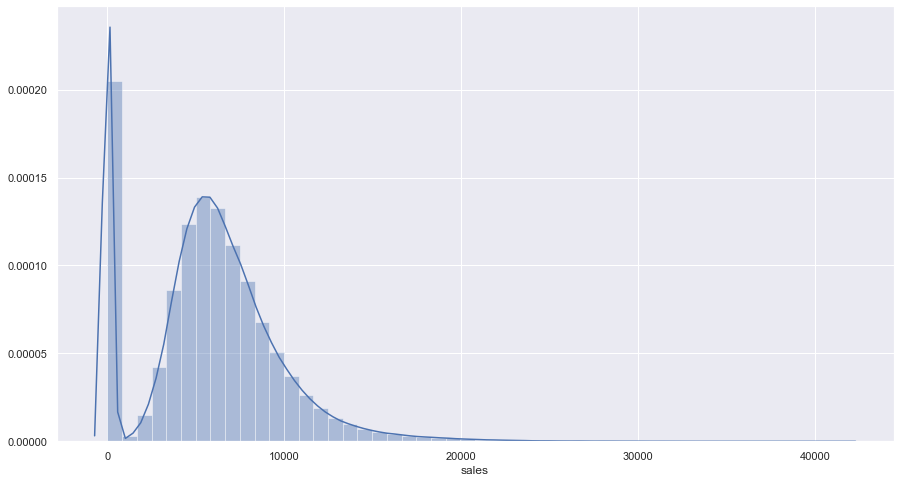

In [58]:
sns.distplot(df1['sales'])

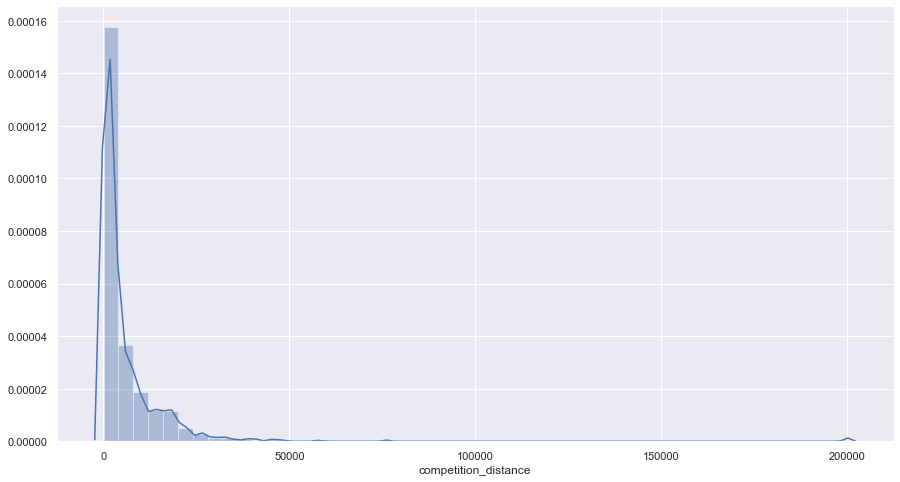

In [59]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [60]:
cat_attributes.apply(lambda col: col.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

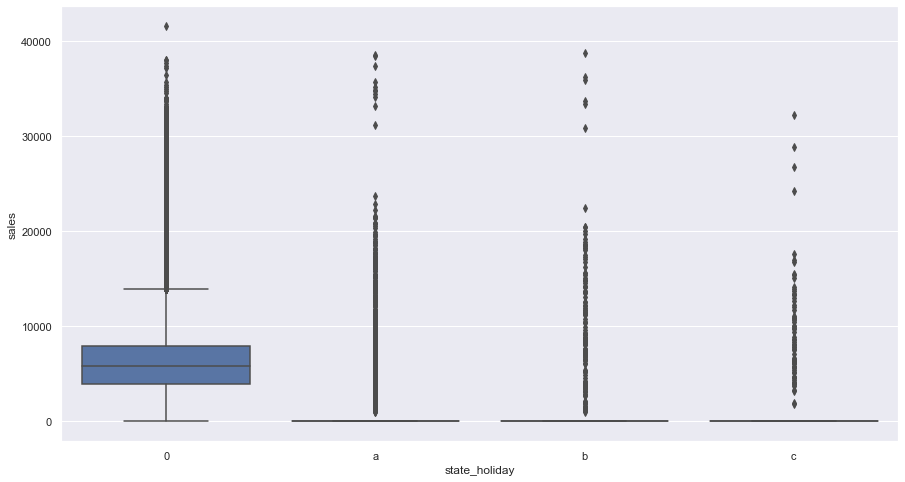

In [62]:
sns.boxplot(data=df1, x='state_holiday', y='sales')

O gráfico acima não dá para enxergar muito bem, isso acontece porque os ranges (intervalos) são muito diferente para cada variável. Para facilitar a visualização vamos filtrar os dados e selecionar apenas os dias que tiveream feríado (classes `a`, `b` ou `c`).

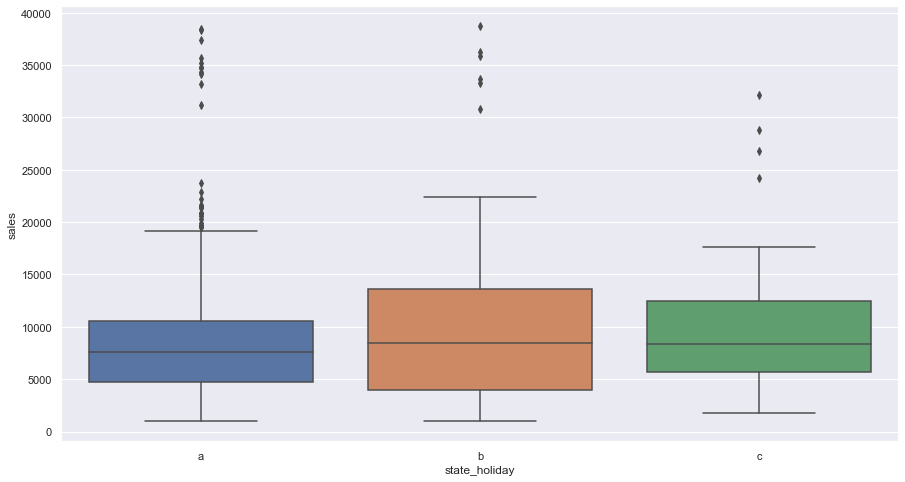

In [66]:
df_aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

sns.boxplot(data=df_aux, x='state_holiday', y='sales')

Vamos plotar todos os gráficos:

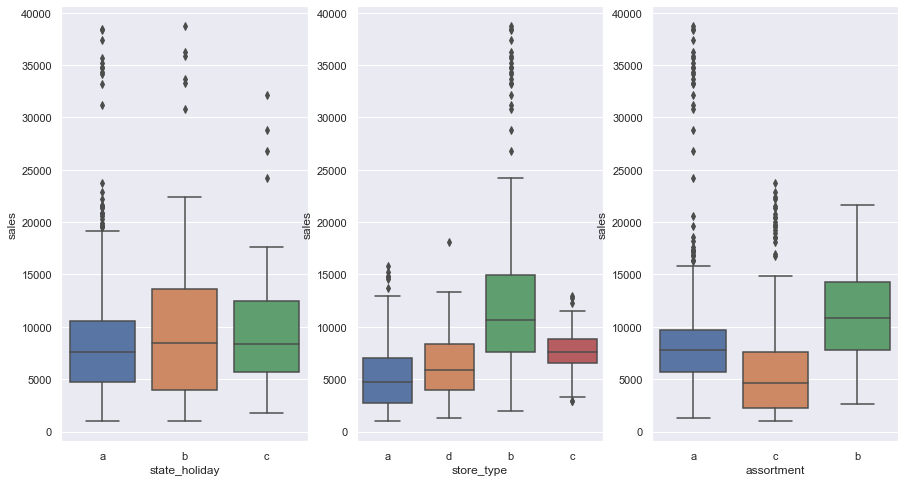

In [72]:
fig, ax = plt.subplots(1, 3)

sns.boxplot(data=df_aux, x='state_holiday', y='sales', ax=ax[0])
sns.boxplot(data=df_aux, x='store_type',    y='sales', ax=ax[1])
sns.boxplot(data=df_aux, x='assortment',    y='sales', ax=ax[2])

## 1.8